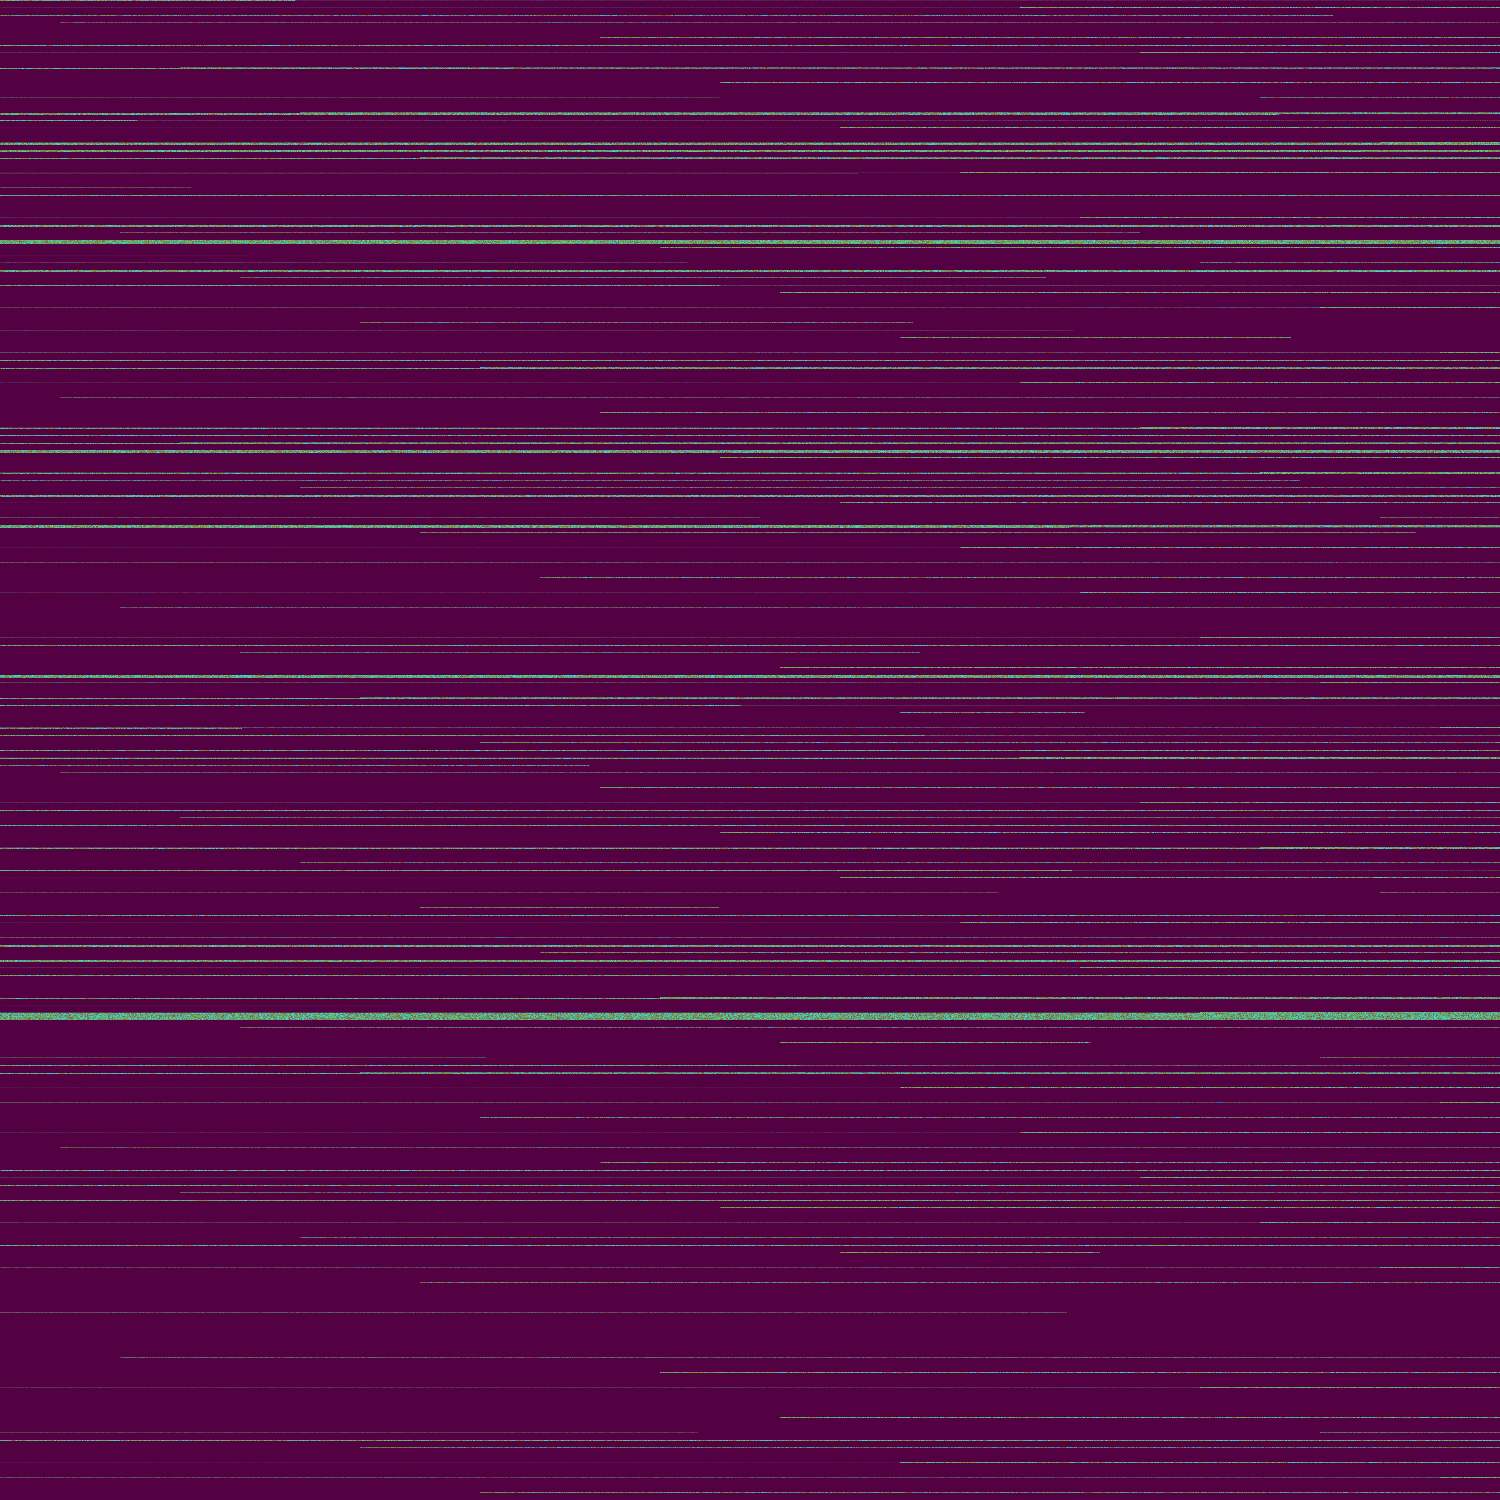

In [14]:
from PIL import Image
gen_seq = Image.open("gen_seq_resized.png")
gen_seq

In [61]:
gen_seq = gen_seq.resize((255, 255))
plt.imsave('gen_seq_resized.png', gen_seq)

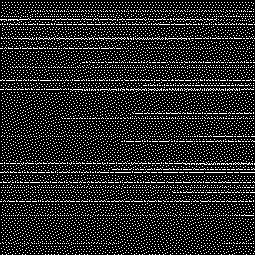

In [3]:
# img_bin = gen_seq.convert("1")
# img_bin

In [16]:
filter_size = 5
overlap_n = 4

learning_rate = 0.01

In [17]:
from pydbm.dbm.deepboltzmannmachine.shape_boltzmann_machine import ShapeBoltzmannMachine

In [18]:
from pydbm.dbm.builders.dbm_multi_layer_builder import DBMMultiLayerBuilder

In [25]:
import numpy as np
dbm = ShapeBoltzmannMachine(
    DBMMultiLayerBuilder(),
    learning_rate=learning_rate,
    overlap_n=overlap_n,
    filter_size=filter_size
)

img_arr = np.asarray(img_bin)
img_arr = img_arr.astype(np.float64)


dbm.learn(
    img_arr,
    training_count=5,# k
    batch_size=300,
    r_batch_size=-1,
    sgd_flag=True # using stochastic gradient descent
)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `inferencing_plan` will be removed in future version.
  


In [28]:
inferenced_data_arr = dbm.visible_points_arr.copy()
gen = Image.fromarray(np.uint8(inferenced_data_arr)).convert('RGB')

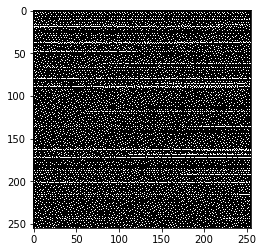

In [30]:
import matplotlib.pyplot as plt
plt.imshow(gen, interpolation='nearest')
plt.show()

In [59]:
plt.imsave('generated_gen_seq.png', gen)

In [70]:
npImage = np.array(Image.open("gen_seq_resized.png").convert('RGB'))
npImage

array([[[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       ...,

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]],

       [[84,  1, 68],
        [84,  1, 68],
        [84,  1, 68],
        ...,
        [84,  1, 68],
        [84,  1, 68],
        [84,  1, 68]]], dtype=uint8)

In [71]:
npMask=np.array(Image.open("generated_gen_seq.png").convert("RGB"))
npMask

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [104]:
cond = npMask<500

In [105]:
pixels=np.where(cond, npImage, npMask)

In [106]:
result=Image.fromarray(pixels)

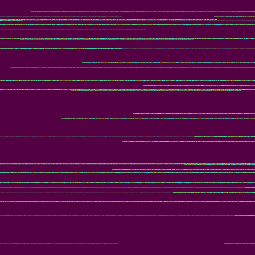

In [107]:
result